<a href="https://colab.research.google.com/github/sammitako/CS-GY-6513-Big-Data/blob/master/Data_analysis_and_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=5d191b1fc0896a571d2e93a88053a55f394055e6274b525aff11f6b14c7f4d85
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
# import libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import requests
import time
import re
import unicodedata
import pycountry

# File Reader
We selected the columns that we need to answer the questions provided in the project list.
- Species: name, title, product, description, label_product
- Geography: domain, country, location, ships to, loc_name, lat, lon
- Price: price, currency

| Field         | Description                                           |
|---------------|-------------------------------------------------------|
| name          | Short version of the title                            |
| title         | Product Advertisement title                           |
| product       | Name of the product - can be same as title            |
| description   | Description of the product - can be same as title     |
| label_product | Zero shot classifier result label                     |
| domain        | Website where the product is posted                   |
| country       | Country where the advertisement was posted            |
| location      | Location of product                                   |
| ships_to      | Destination of product to be shipped                  |
| loc_name      | Detailed address of location                          |
| lat           | Latitude of the location address                      |
| lon           | Longitude of the location address                     |
| price         | Price of the product                                  |
| currency      | Currency of the price                                 |

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data/Team Notebook/combined_files.csv')
print(df.columns)
print(df.columns.shape)

Index(['name', 'title', 'product', 'description', 'domain', 'country',
       'label_product', 'price', 'currency', 'production_data', 'image', 'url',
       'location', 'ships to', 'loc_name', 'lat', 'lon'],
      dtype='object')
(17,)


In [ ]:
df.head()

name  \
0  20MM RED LEATHER Watch Strap Real Flat Ostrich...   
1  20PKS 3" FISHING Rock Cod Rig Twin Bulb Squids...   
2  25 UNPAINTED SALTWATER Round Ball Jig Heads Re...   
3                2893 KUHNERT 1911 - African Ostrich   
4  40/20PCS SOFT FISHING Lure Paddle Tail Swimbai...   

                                               title  \
0  20MM RED LEATHER Watch Strap Real Flat Ostrich...   
1  20PKS 3" FISHING Rock Cod Rig Twin Bulb Squids...   
2  25 UNPAINTED SALTWATER Round Ball Jig Heads Re...   
3  2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
4  40/20PCS SOFT FISHING Lure Paddle Tail Swimbai...   

                                             product  \
0  20MM RED LEATHER Watch Strap Real Flat Ostrich...   
1  20PKS 3" FISHING Rock Cod Rig Twin Bulb Squids...   
2  25 UNPAINTED SALTWATER Round Ball Jig Heads Re...   
3  2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
4  40/20PCS SOFT FISHING Lure Paddle Tail Swimbai...   

                                         description        domain country  \
0  20mm Red Leather Watch Strap Real Flat Ostrich...  picclick.com     NaN   
1  20pks 3" Fishing Rock Cod Rig Twin Bulb Squids...  picclick.com     NaN   
2  25 Unpainted Saltwater Round Ball Jig Heads Re...  picclick.com     NaN   
3  2893 Kuhnert 1911 - African Ostrich. Giclee Fi...  picclick.com     NaN   
4  40/20Pcs Soft Fishing Lure Paddle Tail Swimbai...  picclick.com     NaN   

         label_product  price currency production_data  \
0  an animal body part  21.99      USD            None   
1            an object  46.88      USD            None   
2            an object  30.20      USD            None   
3  an animal body part   7.34      USD            None   
4            an object   7.99      USD            None   

                                               image  \
0  https://www.picclickimg.com/4asAAOSwAatkmpPo/2...   
1  https://www.picclickimg.com/ZW4AAOSwBKNjTkVr/2...   
2  https://www.picclickimg.com/NH0AAOSwNmVkutkl/2...   
3  https://www.picclickimg.com/ABAAAOSwYrtjm-Ii/2...   
4  https://www.picclickimg.com/qFgAAOSwsxdkrjzO/4...   

                                                 url  \
0  http://picclick.com/20mm-Red-Leather-Watch-Str...   
1  http://picclick.com/20pks-3-Fishing-Rock-Cod-R...   
2  http://picclick.com/25-Unpainted-Saltwater-Rou...   
3  http://picclick.com/2893-Kuhnert-1911-African-...   
4  http://picclick.com/40-20Pcs-Soft-Fishing-Lure...   

                      location ships to loc_name  lat  lon  
0           Houston, Texas, US     None      NaN  NaN  NaN  
1  Chino Hills, California, US     None      NaN  NaN  NaN  
2      Sayre, Pennsylvania, US     None      NaN  NaN  NaN  
3    Kirchen - Herkersdorf, DE     None      NaN  NaN  NaN  
4                Guangzhou, CN     None      NaN  NaN  NaN

In [ ]:
df.shape[0]

375726

# Value constraints and uniqueness

## Examining the 'label_product' Column

The 'label_product' column contains seven categories, and we cannot guarantee that these categories are free from potential trafficking. However, we will operate under the assumption that these labels have been accurately classified through Zero-shot Classification by [VIDA-NYU](https://github.com/VIDA-NYU/wildlife_pipeline). Therefore, we will retain only those records where 'label_product' is categorized as 'an animal body part' or 'a real animal'.

In [ ]:
unique_label_products = df['label_product'].unique()
print(unique_label_products)

['an animal body part' 'an object' 'a print of an animal' 'a toy'
 'a faux animal body part' 'a faux animal' 'a real animal']


In [ ]:
# Drop rows where 'label_product' is neither 'an animal body part' nor 'a real animal'
df = df[~((df['label_product'] != 'an animal body part') & (df['label_product'] != 'a real animal'))]
df.shape[0]

95543

In [ ]:
df['label_product'].unique()

array(['an animal body part', 'a real animal'], dtype=object)

## Data containing NULL values
- Originally, the dataset contained 375,726 rows. However, after excluding specific 'label_product' categories, the total number of rows has been reduced to 95,543.
- The columns 'description', 'country', 'image', 'location', 'loc_name', 'lat', 'lon', and 'price' contain NULL values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             95543 non-null  object 
 1   title            95543 non-null  object 
 2   product          95543 non-null  object 
 3   description      95513 non-null  object 
 4   domain           95543 non-null  object 
 5   country          66 non-null     object 
 6   label_product    95543 non-null  object 
 7   price            64666 non-null  float64
 8   currency         95543 non-null  object 
 9   production_data  95543 non-null  object 
 10  image            95539 non-null  object 
 11  url              95543 non-null  object 
 12  location         5725 non-null   object 
 13  ships to         95543 non-null  object 
 14  loc_name         66 non-null     object 
 15  lat              66 non-null     float64
 16  lon              66 non-null     float64
dtypes: float64(

### Change the string "None" to actual "NaN" values in a DataFrame
We discovered that the columns 'title', 'product', 'description', and 'currency' represent NULL values as 'None' in the dataframe, resulting in an incorrect count of the number of rows. Therefore, we need to examine these columns as well.

In [ ]:
df = df.replace('None', np.nan)

In [ ]:
# Rename the 'production_data' column to 'production_date' for late use
df.rename(columns={'production_data': 'production_date'}, inplace=True)

# Now, the 'name' and 'ship to' fields display NULL values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             68666 non-null  object 
 1   title            95543 non-null  object 
 2   product          95543 non-null  object 
 3   description      68296 non-null  object 
 4   domain           95543 non-null  object 
 5   country          66 non-null     object 
 6   label_product    95543 non-null  object 
 7   price            64666 non-null  float64
 8   currency         64068 non-null  object 
 9   production_date  338 non-null    object 
 10  image            67630 non-null  object 
 11  url              95543 non-null  object 
 12  location         5725 non-null   object 
 13  ships to         0 non-null      float64
 14  loc_name         66 non-null     object 
 15  lat              66 non-null     float64
 16  lon              66 non-null     float64
dtypes: float64(

### Drop 'ship to' column
We will remove the 'ships to' column because it contains no data.

In [ ]:
df = df.drop(columns=['ships to'])
df.head()

name  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3                 2893 KUHNERT 1911 - African Ostrich   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                                title  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                              product  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                          description        domain country  \
0   20mm Red Leather Watch Strap Real Flat Ostrich...  picclick.com     NaN   
3   2893 Kuhnert 1911 - African Ostrich. Giclee Fi...  picclick.com     NaN   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...  picclick.com     NaN   
12  Bring Good Luck Koi Red Fish Pendant Necklace ...  picclick.com     NaN   
13  Fossilized Hemipristis Shark Tooth 1 3/8 Inch ...  picclick.com     NaN   

          label_product  price currency production_date  \
0   an animal body part  21.99      USD             NaN   
3   an animal body part   7.34      USD             NaN   
8   an animal body part  45.99      USD             NaN   
12  an animal body part   1.80      USD             NaN   
13  an animal body part  24.99      USD             NaN   

                                                image  \
0   https://www.picclickimg.com/4asAAOSwAatkmpPo/2...   
3   https://www.picclickimg.com/ABAAAOSwYrtjm-Ii/2...   
8   https://www.picclickimg.com/ZN0AAOSw6l9lB2yi/B...   
12  https://www.picclickimg.com/tnsAAOSwDZljSbGz/B...   
13  https://www.picclickimg.com/mVoAAOSwPyReqhRO/F...   

                                                  url  \
0   http://picclick.com/20mm-Red-Leather-Watch-Str...   
3   http://picclick.com/2893-Kuhnert-1911-African-...   
8   http://picclick.com/BATTLE-BEASTS-1987-Condora...   
12  http://picclick.com/Bring-Good-Luck-Koi-Red-Fi...   
13  http://picclick.com/Fossilized-Hemipristis-Sha...   

                     location loc_name  lat  lon  
0          Houston, Texas, US      NaN  NaN  NaN  
3   Kirchen - Herkersdorf, DE      NaN  NaN  NaN  
8      Fairdale, Kentucky, US      NaN  NaN  NaN  
12                   Yiwu, CN      NaN  NaN  NaN  
13      Sarasota, Florida, US      NaN  NaN  NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             68666 non-null  object 
 1   title            95543 non-null  object 
 2   product          95543 non-null  object 
 3   description      68296 non-null  object 
 4   domain           95543 non-null  object 
 5   country          66 non-null     object 
 6   label_product    95543 non-null  object 
 7   price            64666 non-null  float64
 8   currency         64068 non-null  object 
 9   production_date  338 non-null    object 
 10  image            67630 non-null  object 
 11  url              95543 non-null  object 
 12  location         5725 non-null   object 
 13  loc_name         66 non-null     object 
 14  lat              66 non-null     float64
 15  lon              66 non-null     float64
dtypes: float64(3), object(13)
memory usage: 12.4+ MB


### Species: Name, Title, Product, Description
There are missing values in the columns. We can find these rows with missing (null or empty) values.

In [ ]:
# Check 'name' if there are missing values in the column
df[df['name'].isna()]

name                                              title  \
413     NaN                        Crocodylus niloticus | eBay   
414     NaN                           Great white shark | eBay   
415     NaN                           Great white shark | eBay   
416     NaN                              Nile crocodile | eBay   
417     NaN                              Nile crocodile | eBay   
...     ...                                                ...   
375169  NaN                            Sand tiger shark | eBay   
375273  NaN                                          Mousepads   
375591  NaN  reptile rehoming - Animal Welfare & Rescue, Ad...   
375638  NaN                       Mule Deer Taxidermy For Sale   
375641  NaN           Whitetail & Mule Deer Taxidermy For Sale   

                                                  product description  \
413                           Crocodylus niloticus | eBay         NaN   
414                              Great white shark | eBay         NaN   
415                              Great white shark | eBay         NaN   
416                                 Nile crocodile | eBay         NaN   
417                                 Nile crocodile | eBay         NaN   
...                                                   ...         ...   
375169                            Sand tiger shark | eBay         NaN   
375273                                          Mousepads         NaN   
375591  reptile rehoming - Animal Welfare & Rescue, Ad...         NaN   
375638                       Mule Deer Taxidermy For Sale         NaN   
375641           Whitetail & Mule Deer Taxidermy For Sale         NaN   

                       domain country        label_product  price currency  \
413                   ebay.at     NaN  an animal body part    NaN      NaN   
414                   ebay.at     NaN  an animal body part    NaN      NaN   
415                   ebay.at     NaN  an animal body part    NaN      NaN   
416                   ebay.at     NaN  an animal body part    NaN      NaN   
417                   ebay.at     NaN  an animal body part    NaN      NaN   
...                       ...     ...                  ...    ...      ...   
375169                ebay.ph     NaN  an animal body part    NaN      NaN   
375273            ecrater.com     NaN  an animal body part    NaN      NaN   
375591         preloved.co.uk     NaN  an animal body part    0.0      NaN   
375638  thetaxidermystore.com     NaN  an animal body part    NaN      NaN   
375641  thetaxidermystore.com     NaN  an animal body part    NaN      NaN   

       production_date image  \
413                NaN   NaN   
414                NaN   NaN   
415                NaN   NaN   
416                NaN   NaN   
417                NaN   NaN   
...                ...   ...   
375169             NaN   NaN   
375273             NaN   NaN   
375591             NaN   NaN   
375638             NaN   NaN   
375641             NaN   NaN   

                                                      url location loc_name  \
413     https://www.ebay.at/sch/i.html?_from=R40&_nkw=...      NaN      NaN   
414     https://www.ebay.at/sch/i.html?_from=R40&_nkw=...      NaN      NaN   
415     https://www.ebay.at/sch/i.html?_from=R40&_nkw=...      NaN      NaN   
416     https://www.ebay.at/sch/i.html?_from=R40&_nkw=...      NaN      NaN   
417     https://www.ebay.at/sch/i.html?_from=R40&_nkw=...      NaN      NaN   
...                                                   ...      ...      ...   
375169  https://www.ebay.ph/sch/i.html?_from=R40&_nkw=...      NaN      NaN   
375273         https://www.ecrater.com/c/378827/mousepads      NaN      NaN   
375591  https://www.preloved.co.uk/classifieds/pets/an...      NaN      NaN   
375638  https://www.thetaxidermystore.com/decor-and-co...      NaN      NaN   
375641  https://www.thetaxidermystore.com/taxidermy-mo...      NaN      NaN   

        lat  lon  
413     NaN  NaN  
414     NaN  NaN  
415     N

If the columns 'name', 'title', 'product', and 'description', which we use to identify **'species'**, all have NULL values, we can decide to drop them.

In [ ]:
# Drops rows where all of the specified columns ('name', 'title', 'product', 'description') are NaN (or NA).
df = df.dropna(subset=['name', 'title', 'product', 'description'], how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             68666 non-null  object 
 1   title            95543 non-null  object 
 2   product          95543 non-null  object 
 3   description      68296 non-null  object 
 4   domain           95543 non-null  object 
 5   country          66 non-null     object 
 6   label_product    95543 non-null  object 
 7   price            64666 non-null  float64
 8   currency         64068 non-null  object 
 9   production_date  338 non-null    object 
 10  image            67630 non-null  object 
 11  url              95543 non-null  object 
 12  location         5725 non-null   object 
 13  loc_name         66 non-null     object 
 14  lat              66 non-null     float64
 15  lon              66 non-null     float64
dtypes: float64(3), object(13)
memory usage: 12.4+ MB


In [ ]:
# Let's check if the rows were well-dropped except for #309763
# The 'name', 'title', and 'product' columns are NaN, while the 'description' column contains data.
condition_nan = df['name'].isna() & df['title'].isna() & df['product'].isna()
condition_description = df['description'].notna()
df[condition_nan & condition_description]

Empty DataFrame
Columns: [name, title, product, description, domain, country, label_product, price, currency, production_date, image, url, location, loc_name, lat, lon]
Index: []

In [ ]:
# No change: 95543 -> 95543
df.shape[0]

95543

### Geography: Domain, Country, Location, Ships to, Loc_name, Lat, Lon
We will explore geographic information:
- Since we have location data, we will check for unique values.
- We can see that the Domain column has no null values. We can use the domain names to infer the country (using the country code top-level domain).
- The 'country', 'loc_name', 'lat', and 'lon' columns each originally have 66 data entries.

The goal is to ensure that the 'country' field is populated.

#### Location


In [ ]:
nan_country_df = df[df['country'].isna()].copy()

# Check if 'loc_name', 'lat', 'lon', or 'location' have data (non-null values)
nan_country_df['has_loc_name_data'] = nan_country_df['loc_name'].notna()
nan_country_df['has_lat_data'] = nan_country_df['lat'].notna()
nan_country_df['has_lon_data'] = nan_country_df['lon'].notna()
nan_country_df['has_location_data'] = nan_country_df['location'].notna()

nan_country_df[['domain', 'loc_name', 'lat', 'lon', 'location', 'has_loc_name_data', 'has_lat_data', 'has_lon_data', 'has_location_data']]

domain loc_name  lat  lon                   location  \
0                picclick.com      NaN  NaN  NaN         Houston, Texas, US   
3                picclick.com      NaN  NaN  NaN  Kirchen - Herkersdorf, DE   
8                picclick.com      NaN  NaN  NaN     Fairdale, Kentucky, US   
12               picclick.com      NaN  NaN  NaN                   Yiwu, CN   
13               picclick.com      NaN  NaN  NaN      Sarasota, Florida, US   
...                       ...      ...  ...  ...                        ...   
375639  thetaxidermystore.com      NaN  NaN  NaN                        NaN   
375641  thetaxidermystore.com      NaN  NaN  NaN                        NaN   
375643  thetaxidermystore.com      NaN  NaN  NaN                        NaN   
375649          trocadero.com      NaN  NaN  NaN                        NaN   
375658          trocadero.com      NaN  NaN  NaN                        NaN   

        has_loc_name_data  has_lat_data  has_lon_data  has_location_data  
0                   False         False         False               True  
3                   False         False         False               True  
8                   False         False         False               True  
12                  False         False         False               True  
13                  False         False         False               True  
...                   ...           ...           ...                ...  
375639              False         False         False              False  
375641              False         False         False              False  
375643              False         False         False              False  
375649              False         False         False              False  
375658              False         False         False              False  

[95477 rows x 9 columns]

In [ ]:
selected_rows = nan_country_df[(nan_country_df['has_loc_name_data'] == True) |
                               (nan_country_df['has_lat_data'] == True) |
                               (nan_country_df['has_lon_data'] == True) |
                               (nan_country_df['has_location_data'] == True)].copy()

selected_rows[['domain', 'loc_name', 'lat', 'lon', 'location', 'has_loc_name_data', 'has_lat_data', 'has_lon_data', 'has_location_data']]

domain loc_name  lat  lon  \
0         picclick.com      NaN  NaN  NaN   
3         picclick.com      NaN  NaN  NaN   
8         picclick.com      NaN  NaN  NaN   
12        picclick.com      NaN  NaN  NaN   
13        picclick.com      NaN  NaN  NaN   
...                ...      ...  ...  ...   
375415     gumtree.com      NaN  NaN  NaN   
375423     gumtree.com      NaN  NaN  NaN   
375426     gumtree.com      NaN  NaN  NaN   
375550  preloved.co.uk      NaN  NaN  NaN   
375552  preloved.co.uk      NaN  NaN  NaN   

                                    location  has_loc_name_data  has_lat_data  \
0                         Houston, Texas, US              False         False   
3                  Kirchen - Herkersdorf, DE              False         False   
8                     Fairdale, Kentucky, US              False         False   
12                                  Yiwu, CN              False         False   
13                     Sarasota, Florida, US              False         False   
...                                      ...                ...           ...   
375415  Marton-in-Cleveland, North Yorkshire              False         False   
375423                      Gabalfa, Cardiff              False         False   
375426                      Glenrothes, Fife              False         False   
375550                Skegness, Lincolnshire              False         False   
375552              Middlesbrough, Cleveland              False         False   

        has_lon_data  has_location_data  
0              False               True  
3              False               True  
8              False               True  
12             False               True  
13             False               True  
...              ...                ...  
375415         False               True  
375423         False               True  
375426         False               True  
375550         False               True  
375552         False               True  

[5659 rows x 9 columns]

In [ ]:
def find_true_columns(row):
    true_columns = []
    columns_to_check = ['has_loc_name_data', 'has_lat_data', 'has_lon_data', 'has_location_data']
    for col in columns_to_check:
        if row[col]:
            true_columns.append(col)
    return ', '.join(true_columns)

selected_rows['true_columns'] = selected_rows.apply(find_true_columns, axis=1)

selected_rows[['domain', 'loc_name', 'lat', 'lon', 'location', 'true_columns']]

domain loc_name  lat  lon  \
0         picclick.com      NaN  NaN  NaN   
3         picclick.com      NaN  NaN  NaN   
8         picclick.com      NaN  NaN  NaN   
12        picclick.com      NaN  NaN  NaN   
13        picclick.com      NaN  NaN  NaN   
...                ...      ...  ...  ...   
375415     gumtree.com      NaN  NaN  NaN   
375423     gumtree.com      NaN  NaN  NaN   
375426     gumtree.com      NaN  NaN  NaN   
375550  preloved.co.uk      NaN  NaN  NaN   
375552  preloved.co.uk      NaN  NaN  NaN   

                                    location       true_columns  
0                         Houston, Texas, US  has_location_data  
3                  Kirchen - Herkersdorf, DE  has_location_data  
8                     Fairdale, Kentucky, US  has_location_data  
12                                  Yiwu, CN  has_location_data  
13                     Sarasota, Florida, US  has_location_data  
...                                      ...                ...  
375415  Marton-in-Cleveland, North Yorkshire  has_location_data  
375423                      Gabalfa, Cardiff  has_location_data  
375426                      Glenrothes, Fife  has_location_data  
375550                Skegness, Lincolnshire  has_location_data  
375552              Middlesbrough, Cleveland  has_location_data  

[5659 rows x 6 columns]

In [ ]:
selected_rows['true_columns'].unique()

array(['has_location_data'], dtype=object)

Since the 'location' value is available when other geography-related columns are NULL, we will use the 'location' data to populate the 'country' records.

In [ ]:
selected_rows['location'].unique()

array(['Houston, Texas, US', 'Kirchen - Herkersdorf, DE',
       'Fairdale, Kentucky, US', ..., 'Gabalfa, Cardiff',
       'Glenrothes, Fife', 'Middlesbrough, Cleveland'], dtype=object)

In [ ]:
selected_rows['location'].nunique()

2212

In [ ]:
selected_rows['location'].isna().sum()

0

Manually populating the 'country' field with 'location' data (2212) is not possible because some records only include the city name, not the country name.

- For example, 'Paisley, Renfrewshire' is a town in Scotland (United Kingdom), and 'Eastleigh, Hampshire' is a town in England (United Kingdom).
- By observing the capital letters in the 'location' field, we can parse and populate the 'country' field. For instance, 'Guangzhou, CN' indicates China.
- However, there are some issues with the order of country codes in the 'location' data. For example, in some records, the country code appears at the beginning, while in others, it is at the end. There is no consistent ordering.

To comprehensively address these cases, we will use an [API](https://nominatim.org/release-docs/develop/api/Search/) to obtain the country name. However, we need to follow the policy from Nominatim - 2 requests per second.

In [ ]:
selected_rows.tail()

name  \
375415                           Build a bear accessories   
375423                                 Wolf Invertor 1200   
375426  Horse Head Brass Walking stick - Display Mobil...   
375550     SEA WOLF.BILGE KEEL SAILING YACHT INBOARDVOLVO   
375552             Wolf sky reacher reaches up to 6metres   

                                                    title  \
375415  Build a bear accessories | in Marton-in-Clevel...   
375423  Wolf Invertor 1200 | in Gabalfa, Cardiff | Gum...   
375426  Horse Head Brass Walking stick - Display Mobil...   
375550  SEA WOLF.BILGE KEEL SAILING YACHT INBOARDVOLVO...   
375552  Wolf sky reacher reaches up to 6metres For Sal...   

                                                  product  \
375415  Build a bear accessories | in Marton-in-Clevel...   
375423  Wolf Invertor 1200 | in Gabalfa, Cardiff | Gum...   
375426  Horse Head Brass Walking stick - Display Mobil...   
375550  SEA WOLF.BILGE KEEL SAILING YACHT INBOARDVOLVO...   
375552  Wolf sky reacher reaches up to 6metres For Sal...   

                                              description          domain  \
375415  Build a bear accessories from clothes , footwe...     gumtree.com   
375423  Brand new unused Wolf invertor. Warranty good ...     gumtree.com   
375426  FOR SALE £20 Brass Horse Head Walking Stick wi...     gumtree.com   
375550  A WELL PRESENTEDSAILING YACHT SEA WOLF MARK 1,...  preloved.co.uk   
375552  Wolf Sky Reacher never used PLEASE NOTE WILL O...  preloved.co.uk   

       country        label_product   price currency production_date  ...  \
375415     NaN  an animal body part    20.0      GBP             NaN  ...   
375423     NaN  an animal body part   250.0      GBP             NaN  ...   
375426     NaN  an animal body part    20.0      GBP             NaN  ...   
375550     NaN  an animal body part  4500.0      GBP             NaN  ...   
375552     NaN  an animal body part    35.0      GBP             NaN  ...   

                                                      url  \
375415  https://www.gumtree.com/p/baby-toys/build-a-be...   
375423  https://www.gumtree.com/p/generators/wolf-inve...   
375426  https://www.gumtree.com/p/hobbies-collectibles...   
375550  https://www.preloved.co.uk/adverts/show/122199...   
375552  https://www.preloved.co.uk/adverts/show/122243...   

                                    location loc_name lat  lon  \
375415  Marton-in-Cleveland, North Yorkshire      NaN NaN  NaN   
375423                      Gabalfa, Cardiff      NaN NaN  NaN   
375426                      Glenrothes, Fife      NaN NaN  NaN   
375550                Skegness, Lincolnshire      NaN NaN  NaN   
375552              Middlesbrough, Cleveland      NaN NaN  NaN   

        has_loc_name_data  has_lat_data  has_lon_data  has_location_data  \
375415              False         False         False               True   
375423              False         False         False               True   
375426              False         False         False               True   
375550              False         False         False               True   
375552              False         False         False               True   

             true_columns  
375415  has_location_data  
375423  has_location_data  
375426  has_location_data  
375550  has_location_data  
375552  has_location_data  

[5 rows x 21 columns]

In [ ]:
# https://nominatim.openstreetmap.org/search.php?q=<location>&format=jsonv2&limit=1
# display_name: "Castlemilk, Glasgow, Glasgow City, Scotland, G45 9UG, United Kingdom"

def get_country_from_api(location, retries=3):
    base_url = "https://nominatim.openstreetmap.org/search.php"
    params = {
        "q": location,
        "format": "jsonv2",
        "limit": 1
    }
    try:
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            data = response.json()
            if data:
                display_name = data[0].get("display_name", "")
                return display_name.split(',')[-1].strip()
        elif response.status_code in [429, 503]:
            retry_after = int(response.headers.get('Retry-After', 1))
            time.sleep(retry_after)
            if retries > 0:
                return get_country_from_api(location, retries - 1)
    except requests.RequestException as e:
        if retries > 0:
            time.sleep(1)  # Wait 1 second before retrying
            return get_country_from_api(location, retries - 1)
    return None

In [ ]:
%%time

# Cache to store and reuse results
# Time: 27m - DO NOT RUN THIS BLOCK
location_cache = {}

for index, row in selected_rows.iterrows():
    location = row['location']
    if location not in location_cache:
        country = get_country_from_api(location)
        location_cache[location] = country
        time.sleep(0.5)  # Comply with rate limiting (2 requests per second)
    else:
        country = location_cache[location]
    selected_rows.at[index, 'country'] = country

selected_rows[['location', 'country']]

CPU times: user 4min 9s, sys: 3.32 s, total: 4min 12s
Wall time: 27min 24s


location         country
0                         Houston, Texas, US   United States
3                  Kirchen - Herkersdorf, DE     Deutschland
8                     Fairdale, Kentucky, US   United States
12                                  Yiwu, CN              中国
13                     Sarasota, Florida, US   United States
...                                      ...             ...
375415  Marton-in-Cleveland, North Yorkshire            None
375423                      Gabalfa, Cardiff  United Kingdom
375426                      Glenrothes, Fife  United Kingdom
375550                Skegness, Lincolnshire  United Kingdom
375552              Middlesbrough, Cleveland  United Kingdom

[5659 rows x 2 columns]

In [ ]:
location_api_dict = location_cache
len(location_api_dict)

2212

In [ ]:
# RUN THIS BLOCK
selected_rows['country'] = selected_rows['location'].map(location_api_dict)
selected_rows[['location', 'country']]

location         country
0                         Houston, Texas, US   United States
3                  Kirchen - Herkersdorf, DE     Deutschland
8                     Fairdale, Kentucky, US   United States
12                                  Yiwu, CN              中国
13                     Sarasota, Florida, US   United States
...                                      ...             ...
375415  Marton-in-Cleveland, North Yorkshire            None
375423                      Gabalfa, Cardiff  United Kingdom
375426                      Glenrothes, Fife  United Kingdom
375550                Skegness, Lincolnshire  United Kingdom
375552              Middlesbrough, Cleveland  United Kingdom

[5659 rows x 2 columns]

In [ ]:
selected_rows.country.unique()

array(['United States', 'Deutschland', '中国', 'United Kingdom', None, '日本',
       'Canada', 'Ελλάς', 'Việt Nam', 'España', 'Česko', 'Беларусь',
       'Australia', '대한민국', 'Italia', 'Éire / Ireland', 'Polska',
       'Україна', 'Philippines', 'Portugal',
       'België / Belgique / Belgien', 'România', 'Nederland', 'France',
       'India', 'پاکستان', 'Moldova', 'ශ්\u200dරී ලංකාව இலங்கை',
       'Suomi / Finland', 'ประเทศไทย', 'Schweiz/Suisse/Svizzera/Svizra',
       'Indonesia', 'South Africa', 'Türkiye', 'Singapore', 'ישראל',
       'México', 'Slovenija', 'Lietuva', 'Eesti', '臺灣', 'Hrvatska',
       'الإمارات العربية المتحدة', 'Malaysia', 'الأردن', 'България',
       'Κύπρος - Kıbrıs', 'Հայաստան', 'Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'Latvija',
       'مصر', 'Österreich', 'Kenya', 'Honduras', 'Magyarország',
       'ປະເທດລາວ', 'Argentina', 'Guatemala'], dtype=object)

In [ ]:
selected_rows.country.nunique()

57

Since we have a list of 57 countries with names in different languages, manual translation might be possible. We can use a [library](https://rapidapi.com/googlecloud/api/google-translate1).

In [ ]:
# DO NOT RUN THIS BLOCK
countries = ['United States', 'Deutschland', '中国', 'United Kingdom', '日本',
       'Canada', 'Ελλάς', 'Việt Nam', 'España', 'Česko', 'Беларусь',
       'Australia', '대한민국', 'Italia', 'Éire / Ireland', 'Polska',
       'Україна', 'Philippines', 'Portugal',
       'België / Belgique / Belgien', 'România', 'Nederland', 'France',
       'India', 'پاکستان', 'Moldova', 'ශ්\u200dරී ලංකාව இலங்கை',
       'Suomi / Finland', 'ประเทศไทย', 'Schweiz/Suisse/Svizzera/Svizra',
       'Indonesia', 'South Africa', 'Türkiye', 'Singapore', 'ישראל',
       'México', 'Slovenija', 'Lietuva', 'Eesti', '臺灣', 'Hrvatska',
       'الإمارات العربية المتحدة', 'Malaysia',
       'ព្រះរាជាណាចក្រ\u200bកម្ពុជា', 'الأردن', 'България',
       'Κύπρος - Kıbrıs', 'Հայաստան', 'Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'Latvija',
       'مصر', 'Österreich', 'Kenya', 'Honduras', 'Magyarország',
       'ປະເທດລາວ', 'Argentina', 'Guatemala']

url = "https://google-translate1.p.rapidapi.com/language/translate/v2"
headers = {
	'content-type': 'application/x-www-form-urlencoded',
  'Accept-Encoding': 'application/gzip',
  'X-RapidAPI-Key': '7a573598e0msh542f8a5594b3499p1ad8b1jsna64d255c0296',
  'X-RapidAPI-Host': 'google-translate1.p.rapidapi.com'
}

translations = {}

# Iterate over each country and make the API call
for country in countries:
    payload = {
        "q": country,
        "target": "en"
    }
    response = requests.post(url, data=payload, headers=headers)

    # Check if the response is successful
    if response.status_code == 200:
        response_json = response.json()
        translated_text = response_json.get('data', {}).get('translations', [{}])[0].get('translatedText', '')
        translations[country] = translated_text
    else:
        print(f"Failed to translate {country}")
        translations[country] = "Translation Failed"

# Print the translations
for country, translated in translations.items():
    print(f"{country}: {translated}")

Failed to translate Magyarország
Failed to translate ປະເທດລາວ
Failed to translate Argentina
Failed to translate Guatemala
United States: United States
Deutschland: Germany
中国: China
United Kingdom: United Kingdom
日本: Japan
Canada: Canada
Ελλάς: Hellas
Việt Nam: Vietnam
España: Spain
Česko: Czechia
Беларусь: Belarus
Australia: Australia
대한민국: korea
Italia: Italy
Éire / Ireland: Ireland / Ireland
Polska: Poland
Україна: Ukraine
Philippines: Philippines
Portugal: Portugal
België / Belgique / Belgien: Belgium / Belgique / Belgien
România: Romania
Nederland: The Netherlands
France: France
India: India
پاکستان: Pakistan
Moldova: Moldavia
ශ්‍රී ලංකාව இலங்கை: Sri Lanka Sri Lanka
Suomi / Finland: Suomi Finland
ประเทศไทย: Thailand
Schweiz/Suisse/Svizzera/Svizra: Schweiz/Suisse/Svizzera/Svizra
Indonesia: Indonesia
South Africa: South Africa
Türkiye: Türkiye
Singapore: Singapore
ישראל: Israel
México: Mexico
Slovenija: Slovenia
Lietuva: Lithuania
Eesti: Estonia
臺灣: Taiwan
Hrvatska: Croatia
الإمارات

In [ ]:
failed_translations = {country: translation for country, translation in translations.items() if translation == "Translation Failed"}
for country, translation in failed_translations.items():
    print(f"Failed to translate '{country}': {translation}")

Failed to translate 'Magyarország': Translation Failed
Failed to translate 'ປະເທດລາວ': Translation Failed
Failed to translate 'Argentina': Translation Failed
Failed to translate 'Guatemala': Translation Failed


In [ ]:
# Manually normalize some inconsistent country names
translations['대한민국'] = 'Korea'
translations['Éire / Ireland'] = 'Ireland'
translations['België / Belgique / Belgien'] = 'Belgium'
translations['ශ්\u200dරී ලංකාව இலங்கை'] = 'Sri Lanka'
translations['Suomi / Finland']= 'Finland'
translations['Schweiz/Suisse/Svizzera/Svizra']= 'Switzerland'
translations['Türkiye'] = 'Turkey'
translations['ព្រះរាជាណាចក្រ\u200bកម្ពុជា'] = 'Cambodia'
translations['Cyprus - Kıbrıs'] = 'Cyprus'
translations['Κύπρος - Kıbrıs'] = 'Cyprus'
translations['Հայաստան'] = 'Armenia'
translations['Maroc ⵍⵎⵖⵔⵉⴱ المغرب'] = 'Morocco'
translations['Latvija'] = 'Latvia'
translations['مصر'] = 'Egypt'
translations['Österreich'] = 'Austria'
translations['Kenya'] = 'Kenya'
translations['Honduras'] = 'Honduras'
translations['Magyarország'] = 'Hungary'
translations['ປະເທດລາວ'] = 'Laos'
translations['Argentina'] = 'Argentina'
translations['Guatemala'] = 'Guatemala'

In [ ]:
translations

{'United States': 'United States',
 'Deutschland': 'Germany',
 '中国': 'China',
 'United Kingdom': 'United Kingdom',
 '日本': 'Japan',
 'Canada': 'Canada',
 'Ελλάς': 'Hellas',
 'Việt Nam': 'Vietnam',
 'España': 'Spain',
 'Česko': 'Czechia',
 'Беларусь': 'Belarus',
 'Australia': 'Australia',
 '대한민국': 'Korea',
 'Italia': 'Italy',
 'Éire / Ireland': 'Ireland',
 'Polska': 'Poland',
 'Україна': 'Ukraine',
 'Philippines': 'Philippines',
 'Portugal': 'Portugal',
 'België / Belgique / Belgien': 'Belgium',
 'România': 'Romania',
 'Nederland': 'The Netherlands',
 'France': 'France',
 'India': 'India',
 'پاکستان': 'Pakistan',
 'Moldova': 'Moldavia',
 'ශ්\u200dරී ලංකාව இலங்கை': 'Sri Lanka',
 'Suomi / Finland': 'Finland',
 'ประเทศไทย': 'Thailand',
 'Schweiz/Suisse/Svizzera/Svizra': 'Switzerland',
 'Indonesia': 'Indonesia',
 'South Africa': 'South Africa',
 'Türkiye': 'Turkey',
 'Singapore': 'Singapore',
 'ישראל': 'Israel',
 'México': 'Mexico',
 'Slovenija': 'Slovenia',
 'Lietuva': 'Lithuania',
 'Eesti'

In [ ]:
len(translations)

59

In [ ]:
# DO NOT RUN THIS BLOCK
# Save the 'translations' dictionary to CSV file
filename = "/content/drive/MyDrive/Big Data/country_translations.csv"
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Country', 'TranslatedText'])

    # Write the content from the dictionary
    for country, translated in translations.items():
        writer.writerow([country, translated])

In [ ]:
# READ
translations_path = '/content/drive/MyDrive/Big Data/country_translations.csv'

translations_df = pd.read_csv(translations_path)
print(len(translations_df))
translations_df.head()

59


Country  TranslatedText
0   United States   United States
1     Deutschland         Germany
2              中国           China
3  United Kingdom  United Kingdom
4              日本           Japan

In [ ]:
# Apply the translations to a 'country' column
# selected_rows['country'] = selected_rows['country'].map(translations).fillna(df['country'])

translations_df.set_index('Country', inplace=True)
selected_rows['country'] = selected_rows['country'].map(translations_df['TranslatedText']).fillna(selected_rows['country'])
selected_rows[['location', 'country']]

location         country
0                         Houston, Texas, US   United States
3                  Kirchen - Herkersdorf, DE         Germany
8                     Fairdale, Kentucky, US   United States
12                                  Yiwu, CN           China
13                     Sarasota, Florida, US   United States
...                                      ...             ...
375415  Marton-in-Cleveland, North Yorkshire            None
375423                      Gabalfa, Cardiff  United Kingdom
375426                      Glenrothes, Fife  United Kingdom
375550                Skegness, Lincolnshire  United Kingdom
375552              Middlesbrough, Cleveland  United Kingdom

[5659 rows x 2 columns]

In [ ]:
selected_rows.country.isna().sum()

127

In [ ]:
selected_rows.country.unique()

array(['United States', 'Germany', 'China', 'United Kingdom', None,
       'Japan', 'Canada', 'Hellas', 'Vietnam', 'Spain', 'Czechia',
       'Belarus', 'Australia', 'Korea', 'Italy', 'Ireland', 'Poland',
       'Ukraine', 'Philippines', 'Portugal', 'Belgium', 'Romania',
       'The Netherlands', 'France', 'India', 'Pakistan', 'Moldavia',
       'Sri Lanka', 'Finland', 'Thailand', 'Switzerland', 'Indonesia',
       'South Africa', 'Turkey', 'Singapore', 'Israel', 'Mexico',
       'Slovenia', 'Lithuania', 'Estonia', 'Taiwan', 'Croatia',
       'The United Arab Emirates', 'Malaysia', 'Jordan', 'Bulgaria',
       'Cyprus', 'Armenia', 'Morocco', 'Latvia', 'Egypt', 'Austria',
       'Kenya', 'Honduras', 'Hungary', 'Laos', 'Argentina', 'Guatemala'],
      dtype=object)

In [ ]:
# API(location) -> API(translation)
# Update df['country'] with the country column from selected_rows
for idx, row in selected_rows.iterrows():
    df.at[idx, 'country'] = row['country']

In [ ]:
# Check the update
row_0 = df.iloc[0]
print(row_0)

name               20MM RED LEATHER Watch Strap Real Flat Ostrich...
title              20MM RED LEATHER Watch Strap Real Flat Ostrich...
product            20MM RED LEATHER Watch Strap Real Flat Ostrich...
description        20mm Red Leather Watch Strap Real Flat Ostrich...
domain                                                  picclick.com
country                                                United States
label_product                                    an animal body part
price                                                          21.99
currency                                                         USD
production_date                                                  NaN
image              https://www.picclickimg.com/4asAAOSwAatkmpPo/2...
url                http://picclick.com/20mm-Red-Leather-Watch-Str...
location                                          Houston, Texas, US
loc_name                                                         NaN
lat                               

In [ ]:
location_not_filtered = selected_rows[selected_rows['country'].isna()][['country', 'location']]
location_not_filtered

country                              location
23        None               Muang, Samutprakarn, TH
2221      None                 Hyogoken, default, JP
10453     None                  default, default, HK
15324     None                            åäº¬, CN
17742     None                Baden WÃŒrttemberg, DE
...        ...                                   ...
364405    None                      GrabenstÃ€tt, DE
367811    None                          ZuÌrich, CH
368645    None                  default, default, HK
369091    None                       Bothas Hill, ZA
375415    None  Marton-in-Cleveland, North Yorkshire

[127 rows x 2 columns]

In [ ]:
location_not_filtered.location.unique()

array(['Muang, Samutprakarn, TH', 'Hyogoken, default, JP',
       'default, default, HK', 'å\x8c\x97äº¬, CN',
       'Baden WÃŒrttemberg, DE', 'ValeÌ\x80ncia, ES',
       'Multiple locations, US', 'NYC Tri-State/Miami, NY',
       'Multiple Locations, US', 'Midwest, USA, US',
       'Multiple locations, CN', 'ä¹\x89ä¹\x8c, CN',
       'Sripraya, Bangkok, TH', 'Take a Look at My Other Items, GB',
       'Gannoruwa west , Muruthalawa, LK', 'GarÃ°abÃŠr, IS', 'BrÃŒhl, DE',
       'LÃ\x83Â©on, FR', 'Missour, null, MA', 'nanyangshi, CN',
       'Ð\x90ÐºÑ\x82ÐŸÐ±Ðµ, KZ', 'äž\x9cæµ·å\x8e¿, CN',
       'Manchester, Take a look at my other items, GB',
       'GrabenstÃ€tt, DE',
       'Home of the GREAT WHITE SHARK SOUTH AUSTRALIA, AU',
       'Sheperdsville, KY, USA, US', 'YiwuïŒ\x8cZhejiang, CN',
       'default, HK', 'Ä°STANBUL, TR', 'Doncaster, S.yorks',
       'Las Vegas, USA, 89119, US', 'äž\x8aæµ·åž\x82, äž\x8aæµ·, CN',
       'US, Galnvesto, TX', 'Kiev, default, UA', 'Wilkau-HaÃ\x9flau, 

We still observe location data from which extraction of country names has failed. We can obtain country codes from the remaining location data and infer the full country names using a [library](https://pypi.org/project/pycountry/).

In [ ]:
# We can use country_code to infer country name
def get_country_name_from_code(location):
    country_code = location.split(',')[-1].strip()
    country = pycountry.countries.get(alpha_2=country_code)
    return country.name if country else None

location_not_filtered['location_country_code'] = location_not_filtered['location'].apply(get_country_name_from_code)
location_not_filtered

country                              location location_country_code
23        None               Muang, Samutprakarn, TH              Thailand
2221      None                 Hyogoken, default, JP                 Japan
10453     None                  default, default, HK             Hong Kong
15324     None                            åäº¬, CN                 China
17742     None                Baden WÃŒrttemberg, DE               Germany
...        ...                                   ...                   ...
364405    None                      GrabenstÃ€tt, DE               Germany
367811    None                          ZuÌrich, CH           Switzerland
368645    None                  default, default, HK             Hong Kong
369091    None                       Bothas Hill, ZA          South Africa
375415    None  Marton-in-Cleveland, North Yorkshire                  None

[127 rows x 3 columns]

In [ ]:
# Library(location) -> country_code
# Update 'country' in df with data from 'location_country_code' in location_not_filtered
for idx, row in location_not_filtered.iterrows():
    # Check if 'country' in df is still NaN before updating
    if pd.isna(df.at[idx, 'country']):
        df.at[idx, 'country'] = row['location_country_code']

In [ ]:
# Check the update
df[df['location'] == "åäº¬, CN"]

name  \
15324   SKULL SNAKE VIKING Rock Gothic Punk Men  Stain...   
24986   PUNK 316 STAINLESS Steel Howling Hollow Wolf P...   
112833  WOLF EAGLE VIKING Rock Punk Biker Men Pendant ...   
256925  WOLF HEAD ROCK Punk Gothic Viking Men Stainles...   
345814  PERSONALIZED STAINLESS STEEL Wolf Necklace Pen...   

                                                    title  \
15324   SKULL SNAKE VIKING Rock Gothic Punk Men  Stain...   
24986   PUNK 316 STAINLESS Steel Howling Hollow Wolf P...   
112833  WOLF EAGLE VIKING Rock Punk Biker Men Pendant ...   
256925  WOLF HEAD ROCK Punk Gothic Viking Men Stainles...   
345814  PERSONALIZED STAINLESS STEEL Wolf Necklace Pen...   

                                                  product  \
15324   SKULL SNAKE VIKING Rock Gothic Punk Men  Stain...   
24986   PUNK 316 STAINLESS Steel Howling Hollow Wolf P...   
112833  WOLF EAGLE VIKING Rock Punk Biker Men Pendant ...   
256925  WOLF HEAD ROCK Punk Gothic Viking Men Stainles...   
345814  PERSONALIZED STAINLESS STEEL Wolf Necklace Pen...   

                                              description        domain  \
15324   Skull Snake Viking Rock Gothic Punk Men Stainl...  picclick.com   
24986   Punk 316 Stainless Steel Howling Hollow Wolf P...  picclick.com   
112833  Wolf Eagle Viking Rock Punk Biker Men Pendant ...  picclick.com   
256925  Wolf head Rock Punk Gothic Viking Men Stainles...  picclick.com   
345814  Personalized Stainless Steel Wolf Necklace Pen...  picclick.com   

       country        label_product  price currency production_date  \
15324    China  an animal body part   8.99      USD             NaN   
24986    China  an animal body part   9.89      USD             NaN   
112833   China  an animal body part   8.99      USD             NaN   
256925   China  an animal body part   8.99      USD             NaN   
345814   China  an animal body part   9.96      USD             NaN   

                                                    image  \
15324   https://www.picclickimg.com/hU4AAOSwkcFj1lgO/S...   
24986   https://www.picclickimg.com/MVQAAOSwjTpjLMob/P...   
112833  https://www.picclickimg.com/DnwAAOSw7a9j5Qys/W...   
256925  https://www.picclickimg.com/fW4AAOSwEvFj-PD8/W...   
345814  https://www.picclickimg.com/rIkAAOSwzKdlGlNm/P...   

                                                      url    location  \
15324   http://picclick.com/Skull-Snake-Viking-Rock-Go...  åäº¬, CN   
24986   http://picclick.com/Punk-316-Stainless-Steel-H...  åäº¬, CN   
112833  http://picclick.com/Wolf-Eagle-Viking-Rock-Pun...  åäº¬, CN   
256925  http://picclick.com/Wolf-head-Rock-Punk-Gothic...  åäº¬, CN   
345814  http://picclick.com/Personalized-Stainless-Ste...  åäº¬, CN   

       loc_name  lat  lon  
15324       NaN  NaN  NaN  
24986       NaN  NaN  NaN  
112833      NaN  NaN  NaN  
256925      NaN  NaN  NaN  
345814      NaN  NaN  NaN

In [ ]:
location_not_filtered[location_not_filtered['location_country_code'].isna()]

country                              location location_country_code
41059     None               NYC Tri-State/Miami, NY                  None
46827     None               NYC Tri-State/Miami, NY                  None
99170     None               NYC Tri-State/Miami, NY                  None
152543    None                    Doncaster, S.yorks                  None
160600    None               NYC Tri-State/Miami, NY                  None
160604    None               NYC Tri-State/Miami, NY                  None
162641    None                     US, Galnvesto, TX                  None
195446    None  Nottinghamshire, County Not Supplied                  None
224185    None               NYC Tri-State/Miami, NY                  None
241613    None               NYC Tri-State/Miami, NY                  None
241614    None               NYC Tri-State/Miami, NY                  None
249861    None               NYC Tri-State/Miami, NY                  None
254486    None                       US, Seattle, DC                  None
257060    None                               HK, nil                  None
257105    None                       US, Seattle, DC                  None
257106    None                       US, Seattle, DC                  None
343384    None                       US, Seattle, DC                  None
375415    None  Marton-in-Cleveland, North Yorkshire                  None

In [ ]:
len(location_not_filtered[location_not_filtered['location_country_code'].isna()])

18

In [ ]:
# We can manually populate the 'location_country_code'
location_mapping_to_country = {
    'NYC Tri-State/Miami, NY': 'United States',
    'Doncaster, S.yorks': 'United Kingdom',
    'US, Galnvesto, TX': 'United States',
    'Nottinghamshire, County Not Supplied': 'United Kingdom',
    'US, Seattle, DC': 'United States',
    'HK, nil': 'Hong Kong',
    'Marton-in-Cleveland, North Yorkshire': 'United Kingdom'
}

for location, country in location_mapping_to_country.items():
    location_not_filtered.loc[location_not_filtered['location'] == location, 'location_country_code'] = country
location_not_filtered

country                              location location_country_code
23        None               Muang, Samutprakarn, TH              Thailand
2221      None                 Hyogoken, default, JP                 Japan
10453     None                  default, default, HK             Hong Kong
15324     None                            åäº¬, CN                 China
17742     None                Baden WÃŒrttemberg, DE               Germany
...        ...                                   ...                   ...
364405    None                      GrabenstÃ€tt, DE               Germany
367811    None                          ZuÌrich, CH           Switzerland
368645    None                  default, default, HK             Hong Kong
369091    None                       Bothas Hill, ZA          South Africa
375415    None  Marton-in-Cleveland, North Yorkshire        United Kingdom

[127 rows x 3 columns]

In [ ]:
df['country'].isna().sum()

89836

In [ ]:
# country -> NaN, location_country_code -> NaN (18)
# Update df['country']
for index, row in location_not_filtered.iterrows():
    # Check if 'country' is not null
    if pd.isna(df.at[index, 'country']):
        df.at[index, 'country'] = row['location_country_code']

df['country'].isna().sum()

89818

In [ ]:
df['country'].unique()

array(['United States', 'Germany', 'China', 'United Kingdom', 'Thailand',
       'Japan', 'Canada', nan, 'Hellas', 'Vietnam', 'Spain', 'Czechia',
       'Belarus', 'Australia', 'Korea', 'Italy', 'Hong Kong', 'Ireland',
       'Poland', 'Ukraine', 'Philippines', 'Portugal', 'Belgium',
       'Romania', 'The Netherlands', 'France', 'Switzerland', 'India',
       'Pakistan', 'Moldavia', 'Sri Lanka', 'Finland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Indonesia', 'South Africa', 'Federal Republic of Germany',
       'Turkey', 'Singapore', 'Israel', 'Mexico', 'Iceland', 'Slovenia',
       'Morocco', 'Lithuania', 'Kazakhstan', 'Estonia',
       'Republic of India', 'Taiwan', 'Croatia',
       'The United Arab Emirates', 'Malaysia', 'Jordan', 'Bulgaria',
       'Cyprus', 'Armenia', 'Sweden', 'Latvia', 'Egypt', 'Austria',
       'Kenya', 'Honduras', 'Hungary', 'Korea, Republic of', 'Laos',
       'Viet Nam', 'Argentina', 'Guatemala'], dtype=object)

In [ ]:
df['country'].nunique()

66

Now we can see that the country data has been successfully populated.

In [ ]:
country_location_rows = df[df['location'].notnull() & df['country'].isnull()]
country_location_rows[['location', 'country']]

Empty DataFrame
Columns: [location, country]
Index: []

In [ ]:
# Country: 66 -> 5725 (=location)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             68666 non-null  object 
 1   title            95543 non-null  object 
 2   product          95543 non-null  object 
 3   description      68296 non-null  object 
 4   domain           95543 non-null  object 
 5   country          5725 non-null   object 
 6   label_product    95543 non-null  object 
 7   price            64666 non-null  float64
 8   currency         64068 non-null  object 
 9   production_date  338 non-null    object 
 10  image            67630 non-null  object 
 11  url              95543 non-null  object 
 12  location         5725 non-null   object 
 13  loc_name         66 non-null     object 
 14  lat              66 non-null     float64
 15  lon              66 non-null     float64
dtypes: float64(3), object(13)
memory usage: 14.4+ MB


In [ ]:
country_percentage = (df['country'].notna().sum()) / len(df['country']) * 100

print("The percentage of rows where the 'country' column is not null: ", country_percentage)

The percentage of rows where the 'country' column is not null:  5.992066399422249


#### Domain

1. We can use ccTLDs (Country Code Top-Level Domains) to populate the 'country' columns, which still remain NaN after being pre-processed with 'location' data. (Assumption: The origin of the website where ads are posted can be assumed to be the country where the trading occurs.)
2. Before handling gTLDs (Generic Top-Level Domains), we need to view the unique domain names where the 'country' columns has NaN values.

In [ ]:
# There are no NULL values in the 'domain' column.
print(df['domain'].isna().sum())
df[df['country'].isna()]['domain'].unique()

0


array(['gumtree.com.au', 'picclick.com', 'ebay.at', 'ebay.ca', 'ebay.ch',
       'ebay.co.uk', 'ebay.com.au', 'ebay.com.hk', 'ebay.com.my',
       'ebay.com.sg', 'ebay.com', 'ebay.de', 'ebay.es', 'ebay.fr',
       'ebay.ie', 'ebay.it', 'ebay.nl', 'ebay.ph', 'ebid.net',
       'liveauctioneers.com', 'auctionzip.com', 'canadianlisted.com',
       'ioffer.com', 'preloved.co.uk', 'trademe.co.nz', '1stdibs.com',
       'ecrater.com', 'gumtree.com', 'thetaxidermystore.com',
       'trocadero.com', 'ukclassifieds.co.uk', 'glacierwear.com',
       'chichesterinc.com', 'implora.com', 'boneroom.com',
       'usedcalgary.com'], dtype=object)

In [ ]:
# Domain has no null values
print(df['domain'].isna().sum())
df['domain'].unique()

0


array(['picclick.com', 'gumtree.com.au', 'ebay.at', 'ebay.ca', 'ebay.ch',
       'ebay.co.uk', 'ebay.com.au', 'ebay.com.hk', 'ebay.com.my',
       'ebay.com.sg', 'ebay.com', 'ebay.de', 'ebay.es', 'ebay.fr',
       'ebay.ie', 'ebay.it', 'ebay.nl', 'ebay.ph', 'ebid.net',
       'liveauctioneers.com', 'auctionzip.com', 'canadianlisted.com',
       'ecrater.com', 'ioffer.com', 'preloved.co.uk', 'trademe.co.nz',
       '1stdibs.com', 'gumtree.com', 'thetaxidermystore.com',
       'trocadero.com', 'ukclassifieds.co.uk', 'glacierwear.com',
       'chichesterinc.com', 'implora.com', 'boneroom.com',
       'usedcalgary.com'], dtype=object)

In [ ]:
# Domain has 36 unique domain names, which will be mapped to their top-level domains
df['domain'].nunique()

36

In [ ]:
# Before mapping them to their TLDs, we need to check their countries
df['country'].unique()

array(['United States', 'Germany', 'China', 'United Kingdom', 'Thailand',
       'Japan', 'Canada', nan, 'Hellas', 'Vietnam', 'Spain', 'Czechia',
       'Belarus', 'Australia', 'Korea', 'Italy', 'Hong Kong', 'Ireland',
       'Poland', 'Ukraine', 'Philippines', 'Portugal', 'Belgium',
       'Romania', 'The Netherlands', 'France', 'Switzerland', 'India',
       'Pakistan', 'Moldavia', 'Sri Lanka', 'Finland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Indonesia', 'South Africa', 'Federal Republic of Germany',
       'Turkey', 'Singapore', 'Israel', 'Mexico', 'Iceland', 'Slovenia',
       'Morocco', 'Lithuania', 'Kazakhstan', 'Estonia',
       'Republic of India', 'Taiwan', 'Croatia',
       'The United Arab Emirates', 'Malaysia', 'Jordan', 'Bulgaria',
       'Cyprus', 'Armenia', 'Sweden', 'Latvia', 'Egypt', 'Austria',
       'Kenya', 'Honduras', 'Hungary', 'Korea, Republic of', 'Laos',
       'Viet Nam', 'Argentina', 'Guatemala'], dtype=object)

In [ ]:
# So far, we have 66 unique countries
df['country'].nunique()

66

1. Extract Country Codes for country code top-level domains (ccTLDs)
2. Handle generic top-level domains (gTLDs) like ".com",".org", or ".net". We will use other geography-related columns.


In [ ]:
# 1. Extract ccTLDs
ccTLDs = ['uk', 'au', 'nz', 'ca', 'ch', 'hk', 'my', 'sg', 'de', 'es', 'fr', 'ie', 'it', 'nl', 'ph', 'at']

country_mapping = {
    'uk': 'United Kingdom',
    'au': 'Australia',
    'nz': 'New Zealand',
    'ca': 'Canada',
    'ch': 'Switzerland',
    'hk': 'Hong Kong',
    'my': 'Malaysia',
    'sg': 'Singapore',
    'de': 'Germany',
    'es': 'Spain',
    'fr': 'France',
    'ie': 'Ireland',
    'it': 'Italy',
    'nl': 'Netherlands',
    'ph': 'Philippines',
    'at': 'Austria'
}

In [ ]:
def extract_country_code(domain):
    parts = domain.split('.')
    # The last part is a country code
    return parts[-1].lower()

df['domain_country_code'] = df['domain'].apply(extract_country_code)
df['domain_country_code']

0         com
3         com
8         com
12        com
13        com
         ... 
375639    com
375641    com
375643    com
375649    com
375658    com
Name: domain_country_code, Length: 95543, dtype: object

In [ ]:
df.head()

name  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3                 2893 KUHNERT 1911 - African Ostrich   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                                title  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                              product  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                          description        domain  \
0   20mm Red Leather Watch Strap Real Flat Ostrich...  picclick.com   
3   2893 Kuhnert 1911 - African Ostrich. Giclee Fi...  picclick.com   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...  picclick.com   
12  Bring Good Luck Koi Red Fish Pendant Necklace ...  picclick.com   
13  Fossilized Hemipristis Shark Tooth 1 3/8 Inch ...  picclick.com   

          country        label_product  price currency production_date  \
0   United States  an animal body part  21.99      USD             NaN   
3         Germany  an animal body part   7.34      USD             NaN   
8   United States  an animal body part  45.99      USD             NaN   
12          China  an animal body part   1.80      USD             NaN   
13  United States  an animal body part  24.99      USD             NaN   

                                                image  \
0   https://www.picclickimg.com/4asAAOSwAatkmpPo/2...   
3   https://www.picclickimg.com/ABAAAOSwYrtjm-Ii/2...   
8   https://www.picclickimg.com/ZN0AAOSw6l9lB2yi/B...   
12  https://www.picclickimg.com/tnsAAOSwDZljSbGz/B...   
13  https://www.picclickimg.com/mVoAAOSwPyReqhRO/F...   

                                                  url  \
0   http://picclick.com/20mm-Red-Leather-Watch-Str...   
3   http://picclick.com/2893-Kuhnert-1911-African-...   
8   http://picclick.com/BATTLE-BEASTS-1987-Condora...   
12  http://picclick.com/Bring-Good-Luck-Koi-Red-Fi...   
13  http://picclick.com/Fossilized-Hemipristis-Sha...   

                     location loc_name  lat  lon domain_country_code  
0          Houston, Texas, US      NaN  NaN  NaN                 com  
3   Kirchen - Herkersdorf, DE      NaN  NaN  NaN                 com  
8      Fairdale, Kentucky, US      NaN  NaN  NaN                 com  
12                   Yiwu, CN      NaN  NaN  NaN                 com  
13      Sarasota, Florida, US      NaN  NaN  NaN                 com

In [ ]:
# Fill null values in 'country' column
# Update df['country'] only where it currently has NaN values
df['domain_country'] = df['domain_country_code'].map(country_mapping)
df['country'] = df['country'].fillna(df['domain_country'])

# Display
df[df['country'].notna()][['country', 'domain']]

country          domain
0        United States    picclick.com
3              Germany    picclick.com
8        United States    picclick.com
12               China    picclick.com
13       United States    picclick.com
...                ...             ...
375426  United Kingdom     gumtree.com
375550  United Kingdom  preloved.co.uk
375552  United Kingdom  preloved.co.uk
375582  United Kingdom  preloved.co.uk
375591  United Kingdom  preloved.co.uk

[76887 rows x 2 columns]

In [ ]:
df['country'].unique()

array(['United States', 'Germany', 'China', 'United Kingdom', 'Thailand',
       'Japan', 'Canada', 'Australia', nan, 'Austria', 'Switzerland',
       'Hong Kong', 'Malaysia', 'Singapore', 'Spain', 'France', 'Ireland',
       'Italy', 'Netherlands', 'Philippines', 'New Zealand', 'Hellas',
       'Vietnam', 'Czechia', 'Belarus', 'Korea', 'Poland', 'Ukraine',
       'Portugal', 'Belgium', 'Romania', 'The Netherlands', 'India',
       'Pakistan', 'Moldavia', 'Sri Lanka', 'Finland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Indonesia', 'South Africa', 'Federal Republic of Germany',
       'Turkey', 'Israel', 'Mexico', 'Iceland', 'Slovenia', 'Morocco',
       'Lithuania', 'Kazakhstan', 'Estonia', 'Republic of India',
       'Taiwan', 'Croatia', 'The United Arab Emirates', 'Jordan',
       'Bulgaria', 'Cyprus', 'Armenia', 'Sweden', 'Latvia', 'Egypt',
       'Kenya', 'Honduras', 'Hungary', 'Korea, Republic of', 'Laos',
       'Viet Nam', 'Argentina', 'Guatemala'],

In [ ]:
uk_rows = df[df['country'] == "United Kingdom of Great Britain and Northern Ireland"]
uk_rows[['country','location', 'loc_name']]

country       location  \
46839   United Kingdom of Great Britain and Northern I...  Great Britain   
84002   United Kingdom of Great Britain and Northern I...  Great Britain   
90167   United Kingdom of Great Britain and Northern I...     Manchester   
97548   United Kingdom of Great Britain and Northern I...  Great Britain   
102209  United Kingdom of Great Britain and Northern I...  Great Britain   
134514  United Kingdom of Great Britain and Northern I...      Rotherham   
137060  United Kingdom of Great Britain and Northern I...          Wigan   
141755  United Kingdom of Great Britain and Northern I...  Great Britain   
164790  United Kingdom of Great Britain and Northern I...      Wiltshire   
182102  United Kingdom of Great Britain and Northern I...  Great Britain   
219693  United Kingdom of Great Britain and Northern I...  Great Britain   
224186  United Kingdom of Great Britain and Northern I...  Great Britain   
249884  United Kingdom of Great Britain and Northern I...  Great Britain   
279945  United Kingdom of Great Britain and Northern I...  Great Britain   
329728  United Kingdom of Great Britain and Northern I...  Great Britain   
345350  United Kingdom of Great Britain and Northern I...        Newport   
352640  United Kingdom of Great Britain and Northern I...      Stockport   
361988  United Kingdom of Great Britain and Northern I...      Wiltshire   

                                                 loc_name  
46839   United Kingdom of Great Britain and Northern I...  
84002   United Kingdom of Great Britain and Northern I...  
90167                                          Manchester  
97548   United Kingdom of Great Britain and Northern I...  
102209  United Kingdom of Great Britain and Northern I...  
134514                                          Rotherham  
137060                                   Borough of Wigan  
141755  United Kingdom of Great Britain and Northern I...  
164790                                          Wiltshire  
182102  United Kingdom of Great Britain and Northern I...  
219693  United Kingdom of Great Britain and Northern I...  
224186  United Kingdom of Great Britain and Northern I...  
249884  United Kingdom of Great Britain and Northern I...  
279945  United Kingdom of Great Britain and Northern I...  
329728  United Kingdom of Great Britain and Northern I...  
345350                                            Newport  
352640                               Borough of Stockport  
361988                                          Wiltshire

In [ ]:
len(uk_rows)

18

Since Northern Ireland is part of the United Kingdom, we will use 'United Kingdom' as the unified term for the country.

In [ ]:
korea_rows = df[(df['country'] == "Korea") | (df['country'] == "Korea, Republic of")]
korea_rows[['country','location', 'loc_name']]

country                            location loc_name
6483                 Korea             Yangcheon-gu, Seoul, KR      NaN
34286                Korea  Anyang City, Gyeonggi Province, KR      NaN
101209               Korea                    Seoul, Seoul, KR      NaN
169507               Korea                           Seoul, KR      NaN
286137               Korea                           Seoul, KR      NaN
312212  Korea, Republic of                        wordwide, KR      NaN
314881               Korea                    Seoul, Seoul, KR      NaN
318936  Korea, Republic of                        wordwide, KR      NaN

Since all locations are in South Korea, we will replace the name with 'Republic of Korea'.







In [ ]:
# Replace certain country names that are not consistent with the country_map
# Ireland, India, Germany
country_replacement = {
    'Republic of India': 'India',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Federal Republic of Germany': 'Germany',
    'Hellas': 'Greece',
    'Viet Nam': 'Vietnam',
    'Czechia': 'Czech Republic',
    'Korea': "Republic of Korea",
    'Korea, Republic of': 'Republic of Korea'
}
df['country'] = df['country'].replace(country_replacement)
df['country'].unique()

array(['United States', 'Germany', 'China', 'United Kingdom', 'Thailand',
       'Japan', 'Canada', 'Australia', nan, 'Austria', 'Switzerland',
       'Hong Kong', 'Malaysia', 'Singapore', 'Spain', 'France', 'Ireland',
       'Italy', 'Netherlands', 'Philippines', 'New Zealand', 'Greece',
       'Vietnam', 'Czech Republic', 'Belarus', 'Republic of Korea',
       'Poland', 'Ukraine', 'Portugal', 'Belgium', 'Romania',
       'The Netherlands', 'India', 'Pakistan', 'Moldavia', 'Sri Lanka',
       'Finland', 'Indonesia', 'South Africa', 'Turkey', 'Israel',
       'Mexico', 'Iceland', 'Slovenia', 'Morocco', 'Lithuania',
       'Kazakhstan', 'Estonia', 'Taiwan', 'Croatia',
       'The United Arab Emirates', 'Jordan', 'Bulgaria', 'Cyprus',
       'Armenia', 'Sweden', 'Latvia', 'Egypt', 'Kenya', 'Honduras',
       'Hungary', 'Laos', 'Argentina', 'Guatemala'], dtype=object)

In [ ]:
filtered_by_domain_df = df[pd.isna(df['country']) & df['domain'].notna()]
gtld_df = filtered_by_domain_df[['country', 'domain_country_code', 'domain']]
gtld_df['domain_country_code'].unique()

array(['com', 'net'], dtype=object)

In [ ]:
gtld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18656 entries, 175 to 375658
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              0 non-null      object
 1   domain_country_code  18656 non-null  object
 2   domain               18656 non-null  object
dtypes: object(3)
memory usage: 583.0+ KB


Now, we can see that only gTLDs are left, which can be further used for DNS whois lookups with the assumption that the trading happens at the location where the website is registered or created.

### loc_name, lat, lon
> We should also verify whether other geography-related columns (loc_name, lat, and lon) contain data in rows where the 'country' column is NaN.

Initially, the 'country', 'loc_name', 'lat', and 'lon' columns had an equal number of rows. However, after populating the 'country' data from 'domain' and 'location', we need to verify whether the 'loc_name', 'lat', and 'lon' columns are still useful for completing the 'country' records.

In [ ]:
# Find record where country is NaN, but any other column: loc_name, lat, or lon is not NULL
filtered_geography_df = df[df['country'].isna() & (df['loc_name'].notna() | df['lat'].notna() | df['lon'].notna())]
filtered_geography_df

Empty DataFrame
Columns: [name, title, product, description, domain, country, label_product, price, currency, production_date, image, url, location, loc_name, lat, lon, domain_country_code, domain_country]
Index: []

Finally, we can remove the unnecessary columns - 'loc_name', 'lat', and 'lon'.

In [ ]:
df.drop(['loc_name', 'lat', 'lon'], axis=1, inplace=True)
df.head()

name  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3                 2893 KUHNERT 1911 - African Ostrich   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                                title  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                              product  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                          description        domain  \
0   20mm Red Leather Watch Strap Real Flat Ostrich...  picclick.com   
3   2893 Kuhnert 1911 - African Ostrich. Giclee Fi...  picclick.com   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...  picclick.com   
12  Bring Good Luck Koi Red Fish Pendant Necklace ...  picclick.com   
13  Fossilized Hemipristis Shark Tooth 1 3/8 Inch ...  picclick.com   

          country        label_product  price currency production_date  \
0   United States  an animal body part  21.99      USD             NaN   
3         Germany  an animal body part   7.34      USD             NaN   
8   United States  an animal body part  45.99      USD             NaN   
12          China  an animal body part   1.80      USD             NaN   
13  United States  an animal body part  24.99      USD             NaN   

                                                image  \
0   https://www.picclickimg.com/4asAAOSwAatkmpPo/2...   
3   https://www.picclickimg.com/ABAAAOSwYrtjm-Ii/2...   
8   https://www.picclickimg.com/ZN0AAOSw6l9lB2yi/B...   
12  https://www.picclickimg.com/tnsAAOSwDZljSbGz/B...   
13  https://www.picclickimg.com/mVoAAOSwPyReqhRO/F...   

                                                  url  \
0   http://picclick.com/20mm-Red-Leather-Watch-Str...   
3   http://picclick.com/2893-Kuhnert-1911-African-...   
8   http://picclick.com/BATTLE-BEASTS-1987-Condora...   
12  http://picclick.com/Bring-Good-Luck-Koi-Red-Fi...   
13  http://picclick.com/Fossilized-Hemipristis-Sha...   

                     location domain_country_code domain_country  
0          Houston, Texas, US                 com            NaN  
3   Kirchen - Herkersdorf, DE                 com            NaN  
8      Fairdale, Kentucky, US                 com            NaN  
12                   Yiwu, CN                 com            NaN  
13      Sarasota, Florida, US                 com            NaN

# Text standardization


We will use Fingerprinting method:
- https://openrefine.org/docs/technical-reference/clustering-in-depth
- https://github.com/OpenRefine/OpenRefine/blob/master/main/src/com/google/refine/clustering/binning/FingerprintKeyer.java


In [ ]:
def fingerprint(text):
  # Remove leading/trailing whitespace and convert to lowercase
  text = text.lower().strip()
  # Normalize extended characters to ASCII
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
  # Remove punctuation and control characters
  text = re.sub(r'[^\w\s]', '', text)
  # Split, sort, and deduplicate tokens
  tokens = sorted(set(text.split()))
  # Join tokens back together
  return ' '.join(tokens)

In [ ]:
columns_to_apply_text_standardization = ['product', 'description', 'name', 'title']

In [ ]:
for col in columns_to_apply_text_standardization:
  # Check if the column exists in the DataFrame
  if col in df.columns:
      fingerprint_col_name = f'{col}_fingerprint'
      df[fingerprint_col_name] = df[col].astype(str).apply(fingerprint)

df.head()

name  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3                 2893 KUHNERT 1911 - African Ostrich   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                                title  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                              product  \
0   20MM RED LEATHER Watch Strap Real Flat Ostrich...   
3   2893 KUHNERT 1911 - African Ostrich $7.34 - Pi...   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...   
12  BRING GOOD LUCK Koi Red Fish Pendant Necklace ...   
13  FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch ...   

                                          description        domain  \
0   20mm Red Leather Watch Strap Real Flat Ostrich...  picclick.com   
3   2893 Kuhnert 1911 - African Ostrich. Giclee Fi...  picclick.com   
8   BATTLE BEASTS 1987 Condorassin figure LASER be...  picclick.com   
12  Bring Good Luck Koi Red Fish Pendant Necklace ...  picclick.com   
13  Fossilized Hemipristis Shark Tooth 1 3/8 Inch ...  picclick.com   

          country        label_product  price currency production_date  \
0   United States  an animal body part  21.99      USD             NaN   
3         Germany  an animal body part   7.34      USD             NaN   
8   United States  an animal body part  45.99      USD             NaN   
12          China  an animal body part   1.80      USD             NaN   
13  United States  an animal body part  24.99      USD             NaN   

                                                image  \
0   https://www.picclickimg.com/4asAAOSwAatkmpPo/2...   
3   https://www.picclickimg.com/ABAAAOSwYrtjm-Ii/2...   
8   https://www.picclickimg.com/ZN0AAOSw6l9lB2yi/B...   
12  https://www.picclickimg.com/tnsAAOSwDZljSbGz/B...   
13  https://www.picclickimg.com/mVoAAOSwPyReqhRO/F...   

                                                  url  \
0   http://picclick.com/20mm-Red-Leather-Watch-Str...   
3   http://picclick.com/2893-Kuhnert-1911-African-...   
8   http://picclick.com/BATTLE-BEASTS-1987-Condora...   
12  http://picclick.com/Bring-Good-Luck-Koi-Red-Fi...   
13  http://picclick.com/Fossilized-Hemipristis-Sha...   

                     location domain_country_code domain_country  \
0          Houston, Texas, US                 com            NaN   
3   Kirchen - Herkersdorf, DE                 com            NaN   
8      Fairdale, Kentucky, US                 com            NaN   
12                   Yiwu, CN                 com            NaN   
13      Sarasota, Florida, US                 com            NaN   

                                  product_fingerprint  \
0   20mm 2199 band flat leather men ostrich piccli...   
3      1911 2893 734 african kuhnert ostrich picclick   
8   1987 4599 battle beastformers beasts condorass...   
12  180 adjustable bring chain clavicle fish good ...   
13  1 2499 38 bonus fl fossilized from hemipristis...   

                              description_fingerprint  \
0   100 18mm 19mm 20mm 21mm 22mm about also any ar...   
3   12 1911 2893 300gm2 600 african alle american ...   
8   1987 a action and any battle beastformers beas...   
12  104 10pcs 116 12 126 149 155 174 177 1mm 215 2...   
13  1 10 100 2 25 30 38 41 5 70 a also an and appr...   

                                     name_fingerprint  \
0   20mm band flat leather men ostrich quick real ...   
3                   1911 2893 african kuhnert ostrich   
8   1987 battle beastformers beasts condorassin fi...   
12  adjustable bring chain clavicle fish good koi ...   
13  1 38 bonus fl fossilized from hemipristis inch...   

                        

In [ ]:
# Before vs. After
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df['product'].head(5))
print("==============================")
print(df['product_fingerprint'].head(5))

0      20MM RED LEATHER Watch Strap Real Flat Ostrich Watch Band Quick Release Men $21.99 - PicClick
3                                               2893 KUHNERT 1911 - African Ostrich $7.34 - PicClick
8                  BATTLE BEASTS 1987 Condorassin figure LASER beastformers takara $45.99 - PicClick
12    BRING GOOD LUCK Koi Red Fish Pendant Necklace Clavicle Chain Adjustable Women $1.80 - PicClick
13     FOSSILIZED HEMIPRISTIS SHARK Tooth 1 3/8 Inch & Bonus Items From Venice Fl. $24.99 - PicClick
Name: product, dtype: object
0            20mm 2199 band flat leather men ostrich picclick quick real red release strap watch
3                                                 1911 2893 734 african kuhnert ostrich picclick
8                  1987 4599 battle beastformers beasts condorassin figure laser picclick takara
12    180 adjustable bring chain clavicle fish good koi luck necklace pendant picclick red women
13         1 2499 38 bonus fl fossilized from hemipristis inch items picclick 

# Export the pre-processed geography data (w/ outliers) into csv file

In [ ]:
output_file_path = '/content/drive/MyDrive/Big Data/Team Notebook/preprocessed_data_file_geography.csv'
df.to_csv(output_file_path, index=False)

# Price normalization


## The 'currency' column contains missing values.
- We will check for NaN values in the 'currency' column where the 'price' is not null.
- We will infer the currency from the country data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     68666 non-null  object 
 1   title                    95543 non-null  object 
 2   product                  95543 non-null  object 
 3   description              68296 non-null  object 
 4   domain                   95543 non-null  object 
 5   country                  76887 non-null  object 
 6   label_product            95543 non-null  object 
 7   price                    64666 non-null  float64
 8   currency                 64068 non-null  object 
 9   production_date          338 non-null    object 
 10  image                    67630 non-null  object 
 11  url                      95543 non-null  object 
 12  location                 5725 non-null   object 
 13  domain_country_code      95543 non-null  object 
 14  domain_country       

In [ ]:
df['currency'].unique()

array(['USD', nan, 'EUR', 'CAD', 'CHF', 'GBP', 'AUD', 'HKD', 'MYR', 'SGD',
       'HNL', 'PEN', 'COP', 'CLP', 'CNY', 'UYU', 'GTQ', 'BRL', 'MXN',
       'CRC', 'ILS', 'PYG', 'PHP', 'DOP', 'BOB', 'NIO'], dtype=object)

In [ ]:
# Find rows where the 'currency' is NaN but the 'price' is not null
# 64666-64068 = 598
nan_currency_df = df[df['currency'].isna()].copy()
price = nan_currency_df[nan_currency_df['price'].notna()]
price_df = price[['currency', 'price', 'country']]
price_df

currency  price         country
2384        NaN  40.00  United Kingdom
2410        NaN  21.24     New Zealand
2411        NaN  22.99     New Zealand
2412        NaN  28.98     New Zealand
2415        NaN  66.70     New Zealand
...         ...    ...             ...
373521      NaN  34.49     New Zealand
373524      NaN  28.99     New Zealand
373527      NaN  55.66     New Zealand
373529      NaN  82.55     New Zealand
375591      NaN   0.00  United Kingdom

[598 rows x 3 columns]

In [ ]:
price_df['country'].unique()

array(['United Kingdom', 'New Zealand', nan], dtype=object)

In [ ]:
# We can manually input the missing currency data based on the country
currency_mapping = {
    'United Kingdom': 'GBP',
    'New Zealand': 'NZD'
}

for index, row in df.iterrows():
    if pd.isna(row['currency']) and pd.notna(row['price']):
        if row['country'] in currency_mapping:
            # Update the currency
            df.at[index, 'currency'] = currency_mapping[row['country']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     68666 non-null  object 
 1   title                    95543 non-null  object 
 2   product                  95543 non-null  object 
 3   description              68296 non-null  object 
 4   domain                   95543 non-null  object 
 5   country                  76887 non-null  object 
 6   label_product            95543 non-null  object 
 7   price                    64666 non-null  float64
 8   currency                 64641 non-null  object 
 9   production_date          338 non-null    object 
 10  image                    67630 non-null  object 
 11  url                      95543 non-null  object 
 12  location                 5725 non-null   object 
 13  domain_country_code      95543 non-null  object 
 14  domain_country       

In [ ]:
# Currency: 64068 -> 64641 (+573)
df['currency'].notna().sum()

64641

## Normalize prices using an API


1. To minimize redundant [API](https://fixer.io/documentation) calls, we will store the conversion rates in a dictionary.
2. By using 'USD' as the base currency, we will calculate the normalized prices.

In [ ]:
# DO NOT RUN THIS BLOCK
base_currency = 'USD'
unique_currencies = df['currency'].dropna().unique() # exclude 'NaN' values before using it in API call

api_url = f"http://data.fixer.io/api/latest?access_key=c9609e790319f2ce9ed526050e55b7a7&base={base_currency}&symbols={','.join(unique_currencies)}"

response = requests.get(api_url)
data = response.json()

if data.get('success', False):
    rates = data['rates']
    currency_converter = {currency: rates[currency] for currency in unique_currencies if currency in rates}
    currency_converter[base_currency] = rates.get(base_currency, 1)  # Fallback to 1 if base currency rate is not found
else:
    print("Failed to fetch currency exchange rates")
    print("Response:", data)

In [ ]:
currency_converter

{'USD': 1.094926,
 'EUR': 1,
 'CAD': 1.494081,
 'CHF': 0.966586,
 'GBP': 0.86892,
 'AUD': 1.663768,
 'HKD': 8.536204,
 'MYR': 5.129183,
 'SGD': 1.467642,
 'HNL': 27.099833,
 'PEN': 4.086304,
 'COP': 4424.046685,
 'CLP': 953.822928,
 'CNY': 7.765256,
 'UYU': 42.768415,
 'GTQ': 8.572888,
 'BRL': 5.368206,
 'MXN': 18.741786,
 'CRC': 580.891082,
 'ILS': 4.08988,
 'PYG': 8140.635872,
 'PHP': 60.758635,
 'NZD': 1.801457,
 'DOP': 62.411149,
 'BOB': 7.561409,
 'NIO': 40.265929}

In [ ]:
currency_converter = {
 'USD': 1.094926,
 'EUR': 1,
 'CAD': 1.494081,
 'CHF': 0.966586,
 'GBP': 0.86892,
 'AUD': 1.663768,
 'HKD': 8.536204,
 'MYR': 5.129183,
 'SGD': 1.467642,
 'HNL': 27.099833,
 'PEN': 4.086304,
 'COP': 4424.046685,
 'CLP': 953.822928,
 'CNY': 7.765256,
 'UYU': 42.768415,
 'GTQ': 8.572888,
 'BRL': 5.368206,
 'MXN': 18.741786,
 'CRC': 580.891082,
 'ILS': 4.08988,
 'PYG': 8140.635872,
 'PHP': 60.758635,
 'NZD': 1.801457,
 'DOP': 62.411149,
 'BOB': 7.561409,
 'NIO': 40.265929
 }
currency_converter_eur_path = "/content/drive/MyDrive/Big Data/currency_converter_eur.csv"

with open(currency_converter_eur_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Currency', 'Rate'])

    for currency, rate in currency_converter.items():
        writer.writerow([currency, rate])

In [ ]:
# READ
currency_eur_df = pd.read_csv(currency_converter_eur_path)
currency_converter = dict(zip(currency_eur_df['Currency'], currency_eur_df['Rate']))

In [ ]:
# Convert the currency exchange rates 'EUR' as the base currency into rates based on 'USD' as the base currency
rates = currency_converter
usd_based_rates = {currency: rate / rates['USD'] for currency, rate in rates.items()}

usd_based_rates

{'USD': 1.0,
 'EUR': 0.9133037301150945,
 'CAD': 1.3645497503940904,
 'CHF': 0.8827865992770286,
 'GBP': 0.793587877171608,
 'AUD': 1.5195255204461304,
 'HKD': 7.796146954223389,
 'MYR': 4.684501966342931,
 'SGD': 1.3404029130735773,
 'HNL': 24.750378564396133,
 'PEN': 3.732036685584231,
 'COP': 4040.4983396138186,
 'CLP': 871.1300380117012,
 'CNY': 7.092037270098618,
 'UYU': 39.06055295061036,
 'GTQ': 7.829650588258933,
 'BRL': 4.9028025638262305,
 'MXN': 17.11694306281886,
 'CRC': 530.5299919811932,
 'ILS': 3.7353026597231227,
 'PYG': 7434.873107406344,
 'PHP': 55.491087982201535,
 'NZD': 1.645277397741948,
 'DOP': 57.00033518246895,
 'BOB': 6.905863044625847,
 'NIO': 36.77502315224955}

In [ ]:
# Normalize the prices
base_currency = 'USD'

for index, row in df.iterrows():
    if row['currency'] in usd_based_rates and pd.notna(row['price']):
        # Convert the price to USD
        normalized_price = row['price'] * usd_based_rates[row['currency']]
        df.at[index, 'normalized_price_usd'] = normalized_price
    else:
        df.at[index, 'normalized_price_usd'] = pd.NA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 0 to 375658
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     68666 non-null  object 
 1   title                    95543 non-null  object 
 2   product                  95543 non-null  object 
 3   description              68296 non-null  object 
 4   domain                   95543 non-null  object 
 5   country                  76887 non-null  object 
 6   label_product            95543 non-null  object 
 7   price                    64666 non-null  float64
 8   currency                 64641 non-null  object 
 9   production_date          338 non-null    object 
 10  image                    67630 non-null  object 
 11  url                      95543 non-null  object 
 12  location                 5725 non-null   object 
 13  domain_country_code      95543 non-null  object 
 14  domain_country       

## Outliers detection


### Summary of statistics
- There is no notably large difference between 75% and max values.
- Thus, we can assume that there is no extreme values-Outliers in the data set.

In [ ]:
df['normalized_price_usd'].describe()

count    6.464100e+04
mean     2.254223e+07
std      5.794198e+08
min      0.000000e+00
25%      1.208535e+01
50%      4.337131e+01
75%      5.000000e+02
max      5.205497e+10
Name: normalized_price_usd, dtype: float64

### Visualization
- Box Plot
- Scatter Plot

In [ ]:
# Visualizing Data with Box Plots
fig = px.box(df,  y="normalized_price_usd", title="Box Plot of Normalized Prices")
fig.show()

In [ ]:
fig = px.scatter(df, y="normalized_price_usd", title="Scatter Plot of Normalized Prices")
fig.show()

### Calculating the Interquartile Range (IQR)
- The IQR is the difference between the 75th and 25th percentiles.
- Outliers can be considered as data points that are more than 1.5 * IQR above the 75th percentile or below the 25th percentile.

In [ ]:
Q1 = df['normalized_price_usd'].quantile(0.25)
Q3 = df['normalized_price_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['normalized_price_usd'] < (Q1 - 1.5 * IQR)) | (df['normalized_price_usd'] > (Q3 + 1.5 * IQR))]

print(len(outliers))

12733


# Export the pre-processed geography and price data (w/ outliers) into csv file

In [ ]:
df.head()

In [ ]:
# FINAL FILE (not removed price outliers)
output_file_path = '/content/drive/MyDrive/Big Data/Team Notebook/preprocessed_data_file_geography_price.csv'
df.to_csv(output_file_path, index=False)

# Visualization
https://plotly.com/python/

In [ ]:
# import csv file
df = pd.read_csv('/content/drive/MyDrive/Big Data/Team Notebook/preprocessed_data_file_geography_price.csv')
print(df.columns)
print(df.columns.shape)

Index(['name', 'title', 'product', 'description', 'domain', 'country', 'label_product', 'price',
       'currency', 'production_date', 'image', 'url', 'location', 'domain_country_code',
       'domain_country', 'product_fingerprint', 'description_fingerprint', 'name_fingerprint',
       'title_fingerprint', 'normalized_price_usd'],
      dtype='object')
(20,)


## Geography

In [ ]:
df['country'].unique()

array(['United States', 'Germany', 'China', 'United Kingdom', 'Thailand',
       'Japan', 'Canada', 'Australia', nan, 'Austria', 'Switzerland',
       'Hong Kong', 'Malaysia', 'Singapore', 'Spain', 'France', 'Ireland',
       'Italy', 'Netherlands', 'Philippines', 'New Zealand', 'Greece',
       'Vietnam', 'Czech Republic', 'Belarus', 'Republic of Korea',
       'Poland', 'Ukraine', 'Portugal', 'Belgium', 'Romania',
       'The Netherlands', 'India', 'Pakistan', 'Moldavia', 'Sri Lanka',
       'Finland', 'Indonesia', 'South Africa', 'Turkey', 'Israel',
       'Mexico', 'Iceland', 'Slovenia', 'Morocco', 'Lithuania',
       'Kazakhstan', 'Estonia', 'Taiwan', 'Croatia',
       'The United Arab Emirates', 'Jordan', 'Bulgaria', 'Cyprus',
       'Armenia', 'Sweden', 'Latvia', 'Egypt', 'Kenya', 'Honduras',
       'Hungary', 'Laos', 'Argentina', 'Guatemala'], dtype=object)

In [ ]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(country_counts, locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title_text='Geographical Spread of Advertisements by Country', title_x=0.5,  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.update_layout(margin={"r":10, "t":50, "l":10, "b":10} )

fig.show()

In [ ]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.bar(country_counts, y="country", x="count", color="country", orientation="h", hover_name="country")
fig.update_layout(barmode='stack', bargap=0.1)

# Optionally, adjust bar width
fig.update_traces(marker_line_width=0.1)
fig.show()

### Filter for the top 10 countries

In [ ]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

top_10_countries = country_counts.head(10)

fig = px.pie(top_10_countries, values='count', names='country', title='Top 10 Countries by Count')
fig.show()

In [ ]:
fig = px.bar(top_10_countries, y='count', x='country', color='country',
            title="Top 10 Countries by Count")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

## Price
We will only consider 'normalized_price_usd' value to see the price range distribution. We will also fine-tune the pricing data to enhance the visualization results:

- Drop NaN values.
- Round each number to the nearest integer.


In [ ]:
df = df.dropna(subset=['normalized_price_usd']).copy()

df['normalized_price_usd'] = df['normalized_price_usd'].round(0).astype(int)
print(sorted(df['normalized_price_usd'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
price_counts = df['normalized_price_usd'].value_counts().reset_index()
price_counts.columns = ['normalized_price_usd', 'count']

fig = px.scatter(price_counts, x='normalized_price_usd', y='count')
fig.show()

In [ ]:
fig = px.scatter(price_counts, y='normalized_price_usd', x='count')
fig.show()

In [ ]:
fig = px.scatter(price_counts, x='normalized_price_usd', y='count',
                 size='normalized_price_usd', hover_data=['normalized_price_usd'])
fig.show()

Let's focus on the data where 'normalized_price_usd' is less than $130,000.

In [ ]:
focused_df = df[((df['normalized_price_usd'] >= 0) & (df['normalized_price_usd'] < 1000))]
                #  ((df['normalized_price_usd'] >= 5000) & (df['normalized_price_usd'] < 10000)) |
                #  ((df['normalized_price_usd'] >= 10000) & (df['normalized_price_usd'] <= 130000))]

fig = px.histogram(focused_df, x='normalized_price_usd',
                   nbins=100,
                   title='Price Range Distribution')

fig.update_yaxes(range=[0, 1000])

fig.show()

### Remove outliers
Since we observe a tight zone in the price range, we can experiment by analyzing the data after excluding outliers to observe the distribution.

In [ ]:
Q1 = df['normalized_price_usd'].quantile(0.25)
Q3 = df['normalized_price_usd'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers and keep only valid data
df_no_outliers = df[(df['normalized_price_usd'] >= (Q1 - 1.5 * IQR)) & (df['normalized_price_usd'] <= (Q3 + 1.5 * IQR))]

In [ ]:
# 64641 -> 51908 (outliers: 12733)
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51908 entries, 0 to 95542
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     51826 non-null  object 
 1   title                    51908 non-null  object 
 2   product                  51908 non-null  object 
 3   description              51530 non-null  object 
 4   domain                   51908 non-null  object 
 5   country                  41965 non-null  object 
 6   label_product            51908 non-null  object 
 7   price                    51908 non-null  float64
 8   currency                 51908 non-null  object 
 9   production_date          57 non-null     object 
 10  image                    51509 non-null  object 
 11  url                      51908 non-null  object 
 12  location                 5367 non-null   object 
 13  domain_country_code      51908 non-null  object 
 14  domain_country        

In [ ]:
price_counts_no_outliers = df_no_outliers['normalized_price_usd'].value_counts().reset_index()
price_counts_no_outliers.columns = ['normalized_price_usd', 'count']

In [ ]:
fig = px.scatter(price_counts_no_outliers, x='normalized_price_usd', y='count')
fig.show()

In [ ]:
fig = px.scatter(price_counts_no_outliers, x='normalized_price_usd', y='count',
                 size='normalized_price_usd', hover_data=['normalized_price_usd'])
fig.show()

We can observe more details in the dataset after the removal of outliers, particularly noting that the range between $0 and $200 exhibits a tight density.

In [ ]:
fig = px.box(price_counts_no_outliers,  y="normalized_price_usd", title="Box Plot of Prices Without Outliers")
fig.show()

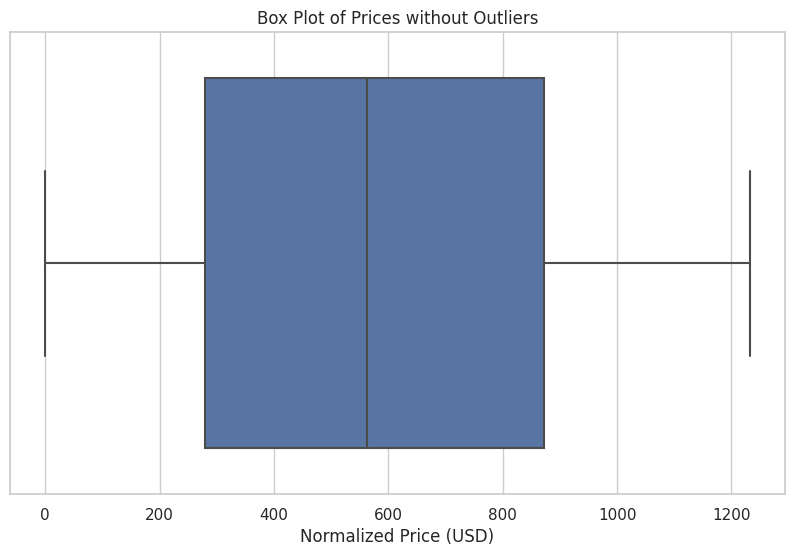

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='normalized_price_usd', data=price_counts_no_outliers)

plt.title('Box Plot of Prices without Outliers')
plt.xlabel('Normalized Price (USD)')

plt.show()

In [ ]:
focused_no_outliers_df = df_no_outliers[((df_no_outliers['normalized_price_usd'] >= 0) & (df_no_outliers['normalized_price_usd'] < 10)) |
                 ((df_no_outliers['normalized_price_usd'] >= 10) & (df_no_outliers['normalized_price_usd'] < 20)) |
                 ((df_no_outliers['normalized_price_usd'] >= 20) & (df_no_outliers['normalized_price_usd'] < 30)) |
                 ((df_no_outliers['normalized_price_usd'] >= 30) & (df_no_outliers['normalized_price_usd'] < 40)) |
                 ((df_no_outliers['normalized_price_usd'] >= 40) & (df_no_outliers['normalized_price_usd'] < 50)) |
                 ((df_no_outliers['normalized_price_usd'] >= 50) & (df_no_outliers['normalized_price_usd'] < 60)) |
                 ((df_no_outliers['normalized_price_usd'] >= 60) & (df_no_outliers['normalized_price_usd'] < 70)) |
                 ((df_no_outliers['normalized_price_usd'] >= 70) & (df_no_outliers['normalized_price_usd'] < 80)) |
                 ((df_no_outliers['normalized_price_usd'] >= 80) & (df_no_outliers['normalized_price_usd'] < 90)) |
                 ((df_no_outliers['normalized_price_usd'] >= 90) & (df_no_outliers['normalized_price_usd'] < 100)) |
                 ((df_no_outliers['normalized_price_usd'] >= 100) & (df_no_outliers['normalized_price_usd'] <= 200)) |
                 ((df_no_outliers['normalized_price_usd'] >= 200) & (df_no_outliers['normalized_price_usd'] <= 300)) |
                 ((df_no_outliers['normalized_price_usd'] >= 300) & (df_no_outliers['normalized_price_usd'] < 400)) |
                 ((df_no_outliers['normalized_price_usd'] >= 400) & (df_no_outliers['normalized_price_usd'] < 500)) |
                 ((df_no_outliers['normalized_price_usd'] >= 500) & (df_no_outliers['normalized_price_usd'] < 1000)) |
                 ((df_no_outliers['normalized_price_usd'] >= 1000)) ]

fig = px.histogram(focused_no_outliers_df, x='normalized_price_usd',
                   nbins=500,
                   title='Price Range Distribution After Removing Outliers')

fig.update_yaxes(range=[0, 2000])

fig.show()

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 200, 300, 400]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

focused_no_outliers_df['price_range'] = pd.cut(focused_no_outliers_df['normalized_price_usd'], bins=bins, labels=labels, right=False)

pie_data = focused_no_outliers_df['price_range'].value_counts().reset_index()
pie_data.columns = ['price_range', 'count']

fig = px.pie(pie_data, values='count', names='price_range', title='Pie Chart of Price Range from USD 0 to USD 200')

fig.show()

# Export the pre-processed geography and price data (w/o outliers) into csv file

In [ ]:
# FINAL FILE (removed price outliers)
output_file_path = '/content/drive/MyDrive/Big Data/Team Notebook/preprocessed_data_file_geography_price_removed_outliers.csv'
df.to_csv(output_file_path, index=False)